In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
import random
import shutil

In [2]:
data_path = '../Data/full dataset'
small_data_path = '../Data/Small Dataset 1000'
extra_small_data_path = '../Data/Small Dataset 200'
figures_output_path = '../Outputs/figures'
csv_outputs ='../Outputs/csv'

In [5]:
labels_df = pd.read_csv(os.path.join(data_path,"trainLabels.csv"))

In [6]:
class_balance = labels_df.groupby("level").count()

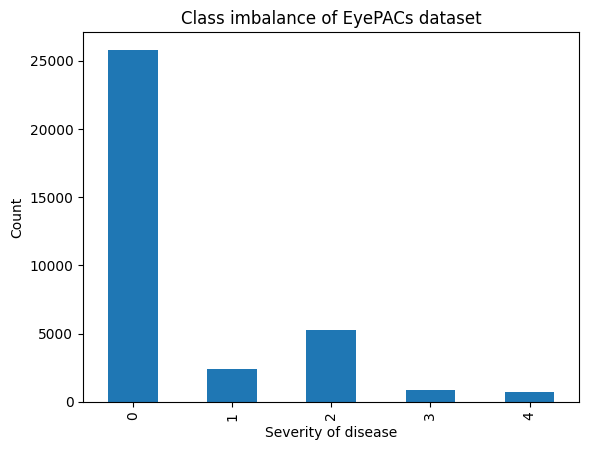

In [7]:

# Plot class imbalance
class_balance.plot.bar(legend=False)
plt.title("Class imbalance of EyePACs dataset")
plt.ylabel("Count")
plt.xlabel("Severity of disease")
plt.savefig(os.path.join(figures_output_path, "Class imbalance.jpg"))

In [8]:
class_balance

,image
level,
0,25810
1,2443
2,5292
3,873
4,708


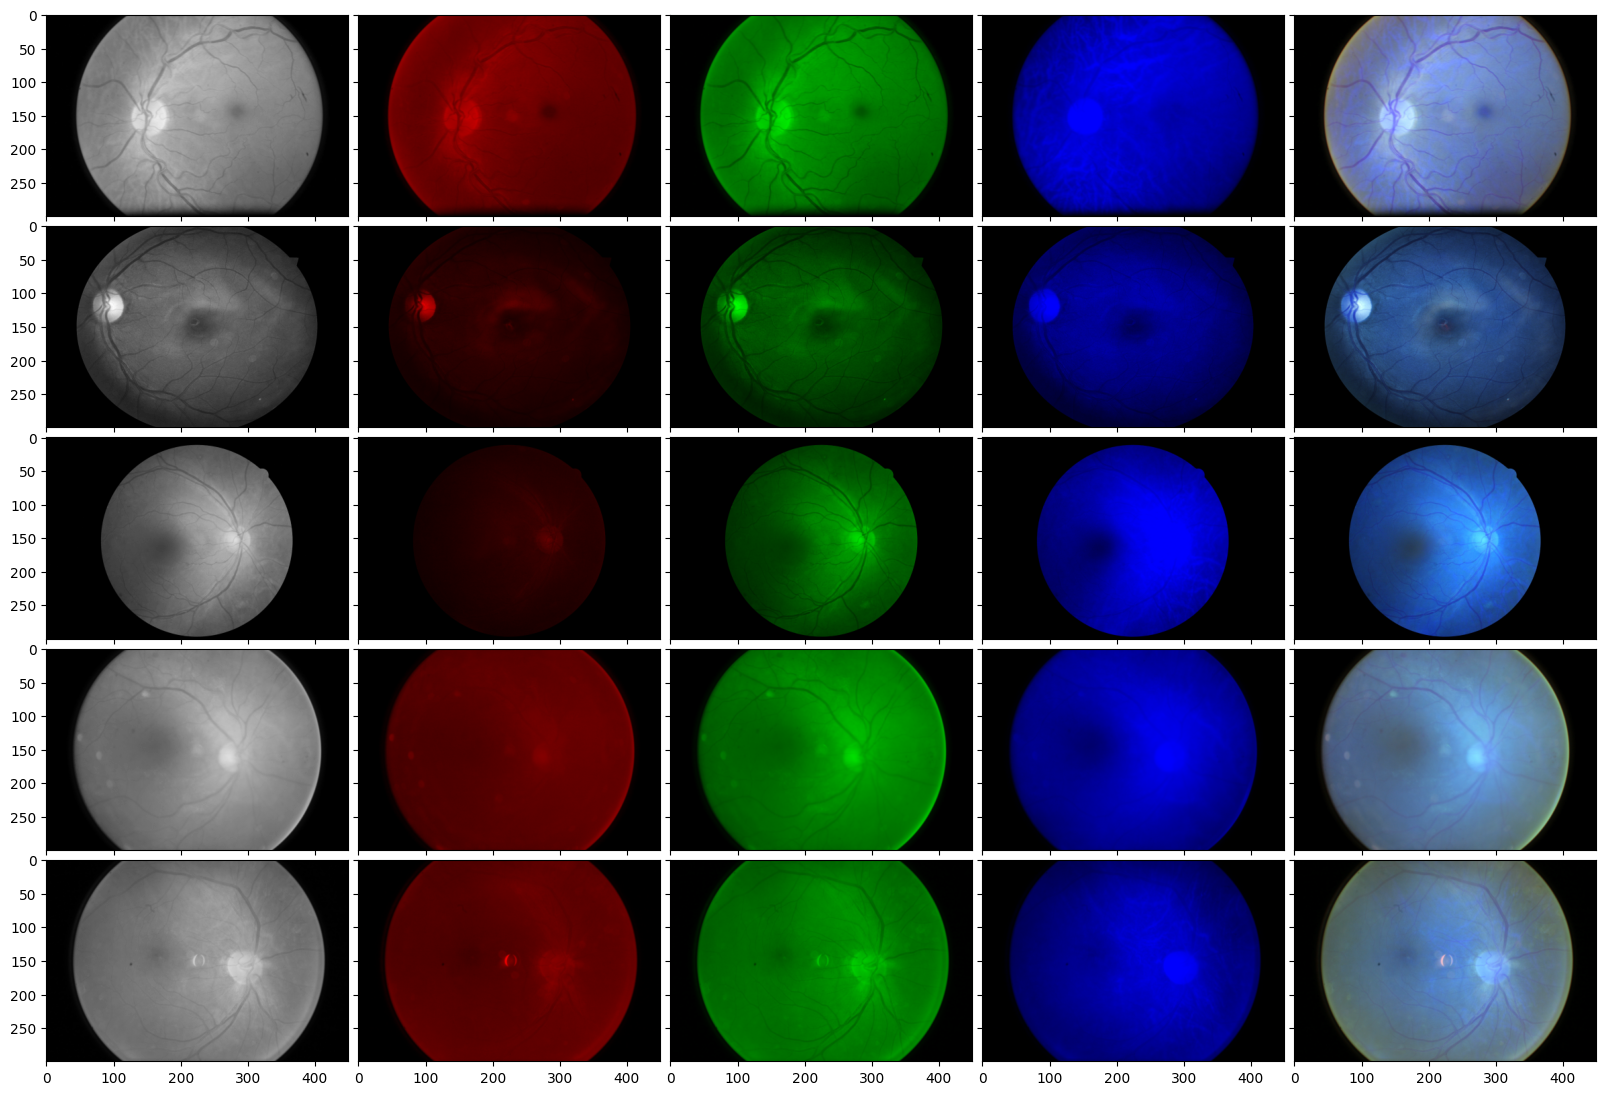

In [40]:
image_dict = dict()
counter=0
for i in [0,1,2,3,4]:
    train_list = os.listdir(os.path.join(extra_small_data_path, 'train',str(i)))

    img = cv2.imread(os.path.join(extra_small_data_path, 'train', str(i),train_list[2]))
    scale_percent = 10 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    img = cv2.resize(img, (450, 300), interpolation = cv2.INTER_AREA)

    b = img.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = img.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = img.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0

    gray_ = img.copy()
    gray = cv2.cvtColor(gray_, cv2.COLOR_BGR2GRAY)
    image_dict[str(i)] = [gray, b, g, r, img]


fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5,5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid,
                  image_dict['0'] + image_dict['1'] + image_dict['2']+ image_dict['3']+ image_dict['4']):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray", vmin=0, vmax=255)
    

#plt.show()
fig.savefig(os.path.join(figures_output_path, "Impact of channel on image.jpg"))


To normalise the images for the CNN the images must be analyised to determine the mean and standard deviation for each channel. As the whole dataset is very large, the validation dataset is used for this analysis

In [9]:
"""red=np.array([])
green=np.array([])
blue =np.array([])
counter=0
for i in [0,1,2,3,4]:
    val_list = os.listdir(os.path.join(extra_small_data_path, 'train',str(i)))
    for file in val_list[:1001]:
        img = cv2.imread(os.path.join(path, 'val', str(i),val_list[1]))
        scale_percent = 10 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)

        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

        b = img.copy()
        # store the blue channel values

        blue = np.append(blue, b[:,:,0])


        g = img.copy()
        # store the green channel values

        green = np.append(green, g[:,:,1])


        r = img.copy()
        # store the red channel values

        red = np.append(red, r[:,:,2])
        counter +=1
        if counter%100==0:
            print(i, len(val_list), counter, counter/len(val_list))
            """

"red=np.array([])\ngreen=np.array([])\nblue =np.array([])\ncounter=0\nfor i in [0,1,2,3,4]:\n    val_list = os.listdir(os.path.join(path, 'val',str(i)))\n    for file in val_list[:1001]:\n        img = cv2.imread(os.path.join(path, 'val', str(i),val_list[1]))\n        scale_percent = 10 # percent of original size\n        width = int(img.shape[1] * scale_percent / 100)\n        height = int(img.shape[0] * scale_percent / 100)\n        dim = (width, height)\n\n        # resize image\n        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)\n\n        b = img.copy()\n        # store the blue channel values\n\n        blue = np.append(blue, b[:,:,0])\n\n\n        g = img.copy()\n        # store the green channel values\n\n        green = np.append(green, g[:,:,1])\n\n\n        r = img.copy()\n        # store the red channel values\n\n        red = np.append(red, r[:,:,2])\n        counter +=1\n        if counter%100==0:\n            print(i, len(val_list), counter, counter/len(v

In [10]:
'''for file in [red, green, blue]:
    print(f"Mean: {file.mean()}\t Std dev: {file.std()}")

pd.DataFrame(red[:1001]).to_csv(os.path.join(csv_outputs, "red.csv"))
pd.DataFrame(green[:1001]).to_csv(os.path.join(csv_outputs, "green.csv"))
pd.DataFrame(blue[:1001]).to_csv(os.path.join(csv_outputs, "blue.csv"))
'''

'for file in [red, green, blue]:\n    print(f"Mean: {file.mean()}\t Std dev: {file.std()}")\n\npd.DataFrame(red[:1001]).to_csv(os.path.join(csv_outputs, "red.csv"))\npd.DataFrame(green[:1001]).to_csv(os.path.join(csv_outputs, "green.csv"))\npd.DataFrame(blue[:1001]).to_csv(os.path.join(csv_outputs, "blue.csv"))\n'

In [11]:
for i in ['train']:
    os.mkdir(os.path.join(small_data_path,i))
    for y in ['0', '1', '2', '3', '4']:
        os.mkdir(os.path.join(small_data_path, i, y))

In [12]:
for y in ['0', '1', '2', '3', '4']:
    counter=0
    file_list = os.listdir(os.path.join(data_path, 'train', y))
    upper_bound=1000
    for n in range(0,upper_bound):
        rand_n = random.randint(0, len(file_list)-1)
        copy_image = file_list[rand_n]
        shutil.copyfile(os.path.join(data_path,'train', y,copy_image), os.path.join(small_data_path,'train', y, f"{counter}_{copy_image}"))
        counter+=1


In [ ]:
 for i in ['train','test','val']:
    for y in ['0','1','2','3','4']:

        shutil.rmtree(os.path.join(extra_small_data_path, i, y))

In [ ]:
for i in ['train']:
    for y in ['0', '1', '2', '3', '4']:
        print(i, y, len(os.listdir(os.path.join(extra_small_data_path, i,y))))

In [9]:
# Validation data class imbalance
sub_dir_list=[]
for path, subdirs, files in os.walk("../Data/full dataset/val"):
    for name in files:
        sub_dir_list.append([os.path.split(path)[-1], name])

In [10]:
val_dataset_list = pd.DataFrame(sub_dir_list)

In [12]:
val_class_imbalance = val_dataset_list.groupby(0).count()/len(val_dataset_list)

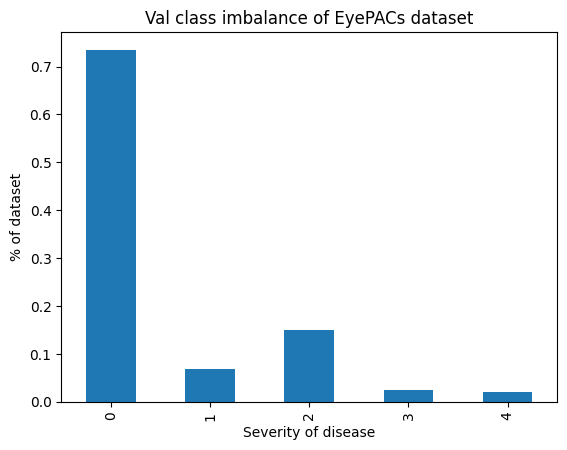

In [13]:
val_class_imbalance.plot.bar(legend=False)
plt.title("Val class imbalance of EyePACs dataset")
plt.ylabel("% of dataset")
plt.xlabel("Severity of disease")
plt.savefig(os.path.join(figures_output_path, "Val class imbalance.jpg"))

In [15]:
val_class_imbalance['remainder'] = 1-val_class_imbalance[1]

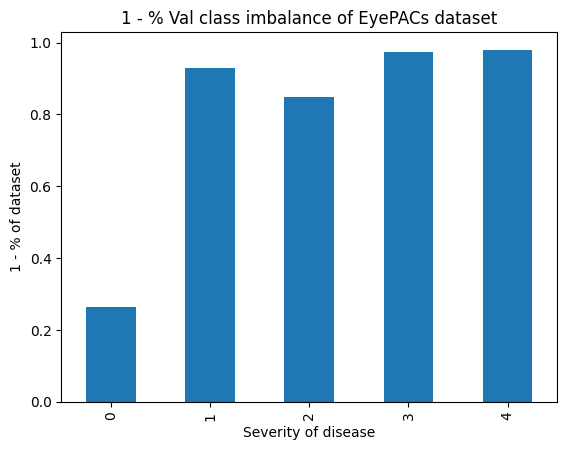

In [19]:
val_class_imbalance['remainder'].plot.bar(legend=False)
plt.title("1 - % Val class imbalance of EyePACs dataset")
plt.ylabel("1 - % of dataset")
plt.xlabel("Severity of disease")
plt.savefig(os.path.join(figures_output_path, "1-Val class imbalance.jpg"))